# Contents
>1. 빅데이터 정의와 예
>2. 하둡의 등장과 소개
>3. Spark 소개
>4. 판다스와 비교
>5. Spark 데이터프레임, 데이터셋, RDD
>6. Spark 개발 환경
>7. Spark 맛 보기


# 1. 빅데이터
> 정의 1
- 서버 한대로 처리할 수 없는 규모의 데이터
- 판다스로 처리할 데이터가 너무 커서 처리가 불가능하다면?

> 정의 2
- 기존의 소프트웨어로는 처리할 수 없는 규모의 데이터
- 대표적인 기존 소프트웨어 오라클이나 MySQL과 같은 관계형 데이터베이스 
    - 분산환경 염두 x 
    - Scale-up접근방식 (메모리 추가, CPU 추가, 디스크 추가)

> 정의 3
- 4V (Volume, Velocity, Variety, Varecity)
1. Volume: 데이터의 크기가 대용량?
2. Velocity: 데이터의 처리 속도가 중요?
3. Variety: 구조화/비구조화 데이터 둘다?
4. Veracity: 데이터의 품질이 좋은지?

> 예제 - 디바이스 데이터
- 모바일 디바이스 (위치정보)
- 스마트 TV
- 센서 데이터 (IoT 센서)

> 예제 - 웹페이지
- 수십조개 이상의 웹 페이지 존재

- 이를 크롤하여 중요한 페이지를 찾아내고 (페이지 랭크) 인덱싱하는 것은
엄청난 크기의 데이터 수집과 계산을 필요로 함

- 사용자 검색어와 클릭 정보 자체도 대용량
    - 이를 마이닝하여 개인화 혹은 별도 서비스 개발이 가능
    - 검색어 자동 완성, 동의어 찾기, 통계 기반 번역,••.
- 이런 문제를 해결하면서 구글이 빅데이터 기술의 발전에 지대한 공헌을 하게 됨

# 2. 하둡의 등장
for 대용량 데이터 처리
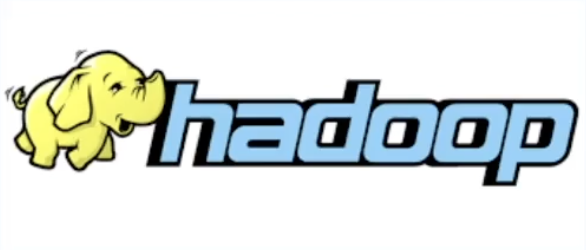
> 대용량 처리 기술이란?
- 분산 환경 기반 (1대 혹은 그 이상의 서버로 구성)
- 분산 컴퓨팅과 분산 파일 시스템이 필요
- `Fault Tolerance`
    - 소수의 서버가 **고장나도 동작**해야함
- 확장이 용이해야함
    - `Scale Out`이라고 부름
    - 서버를 더 늘리므로 시스템의 용량을 늘림

> 하둡(Hadoop)의 등장
- Doug Cutting이 구글랩 발표 논문들에 기반해 만든 오픈소스 프로젝트
    - 2003년 The Google File System
    - 2004년 MapReduce: Simplified Data Processing on Large Cluster
- 처음 시작은 Nutch라는 오픈소스 검색엔진의 하부 프로젝트
    - 하둡은 Doug Cutting의 아들의 코끼리 인형의 이름
    - 2006년에 아파치 톱레벨 별개 프로젝트로 떨어져나옴
> 크게 두 개의 서브 시스템으로 구현됨
1. 분산 파일 시스템인 `HDFS`
2. 분산 컴퓨팅 시스템인 `MapReduce`
- 새로운 프로그래밍 방식으로 대용량 데이터 처리의 효율을 극대화하는데 막추

> MapReduce 프로그래밍의 문제점
- 작업에 따라서는 MapReduce 프로그래밍이 너무 복잡해짐

- 결국 Hive처럼 MapReduce로 구현된 SQL 언어들이 다시 각광을 받게 됨
    - SQL on Hadoop
    - 빅데이터가 뜨면서 SQL이 한물 갔다가 평가되었지만 컴백!
- 또한 MapReduce는 기본적으로 배치 작업에 최적화 (not realtime)

> MapReduce 예제
- word Count : 대용량 처리 관점에서 매커니즘을 제약함. -> 생산성이 떨어짐
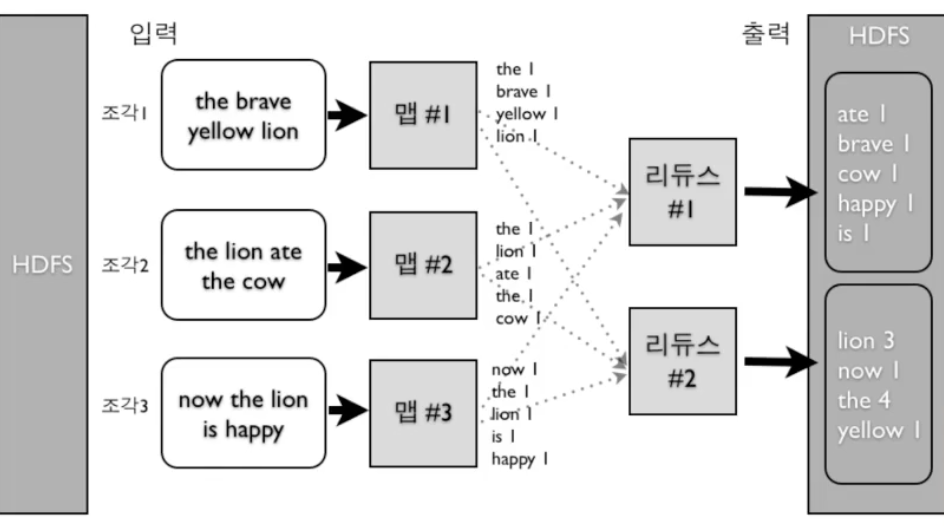

> 하둡(Hadoop)의 발전

- 하둡 1.0은 HDFS위에 MapReduce라는 분산컴퓨팅 시스템이 도는 구조
    - 다른 분산컴퓨팅 시스템은 지원하지 못함
- 하둡 2.0에서 아키덱처가 크게 변경됨
    - 하둡은 기반 분산처리 시스템이 되고 그 위에 애플리케이션 레이어가 올라가는 구조
    - Spark은 하둡 2.0위에서 애플리케이션 레이어로 실행됨
    - 손쉬운 개발을 위한 로컬 모드도 지원: 이번 강좌에서는 로컬 모드 사용

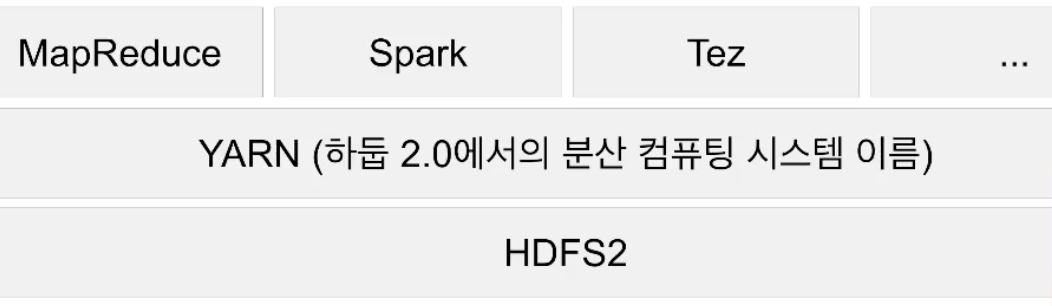

> HDFS - 분산 파일 시스템
- 데이터를 블록단위로 저장
    - 블록의 크기는 128 MB (디폴트)
    - 파일 A에 대해 블록의 크기 별로 저장. $\to$ 네임 노드에 저장. (파괴되면 ㅈ댐)

- 블록 복제 방식 (Replication)
    - 각 블록은 3 군데에 중복 저장됨 (적어도 3대 서버 이상이 존재해야 함.)
    - Fault tolerance를 보장할 수 있는 방식으로 이 블록들은 저장됨. (기본적으로 3대의 서버에 저장)

> 분산 컴퓨팅 시스템

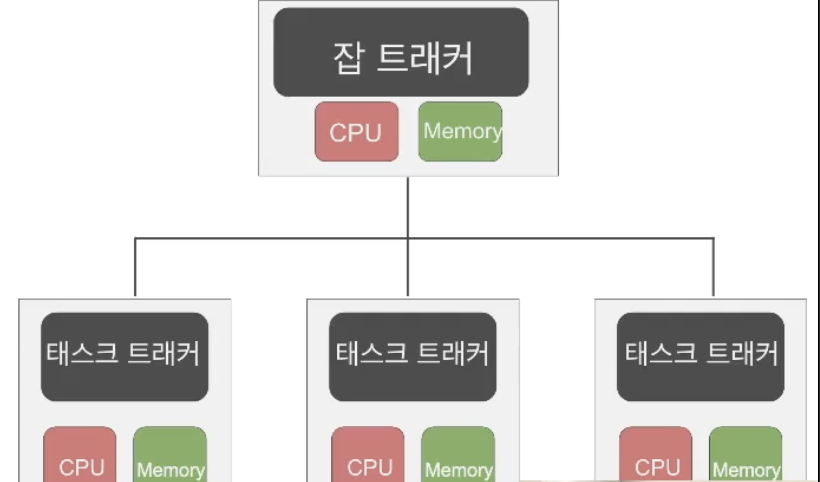
- 하둡 1.0:
    - 하나의 잡 트래커와 다수의 태스크 트래커로 구성됨
    - 잡 트래커가 일을 나눠서 다수의 태스크 트래커에게 분배
- 하둡 2.0:
    - 클라이언트, 리소스 매니저, 노드 매니저, 컨테이너로 역할을 세분화
    - Spark 지원이 2.0부터 시작

> 하둡(Hadoop)을 이용한 데이터 시스템 구성
- 하둡은 흔히 이야기하는 Data Warehouse에 해당
- 웍플로우 관리로는 Airflow가 대세
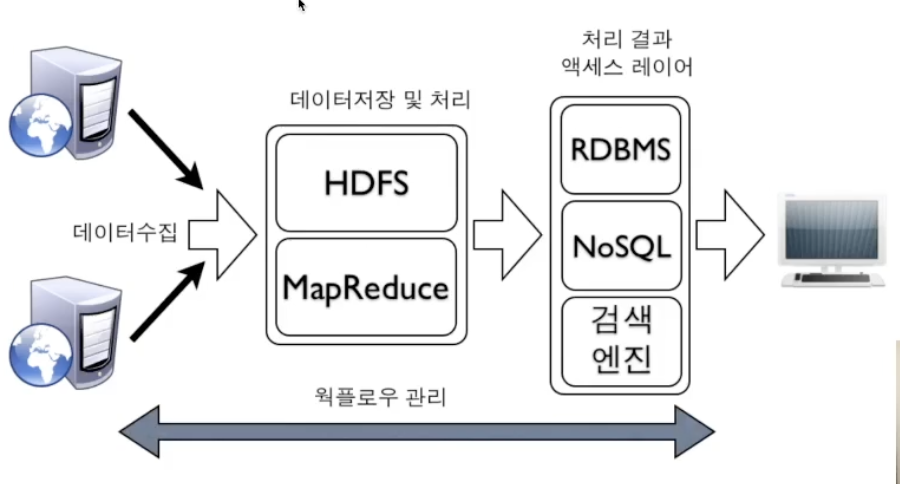
- 가운데가 데이터 웨어하우스.

> 하둡 1.0 VS 하둡 2.0
- 하둡 2.0 YARN이라고 부름

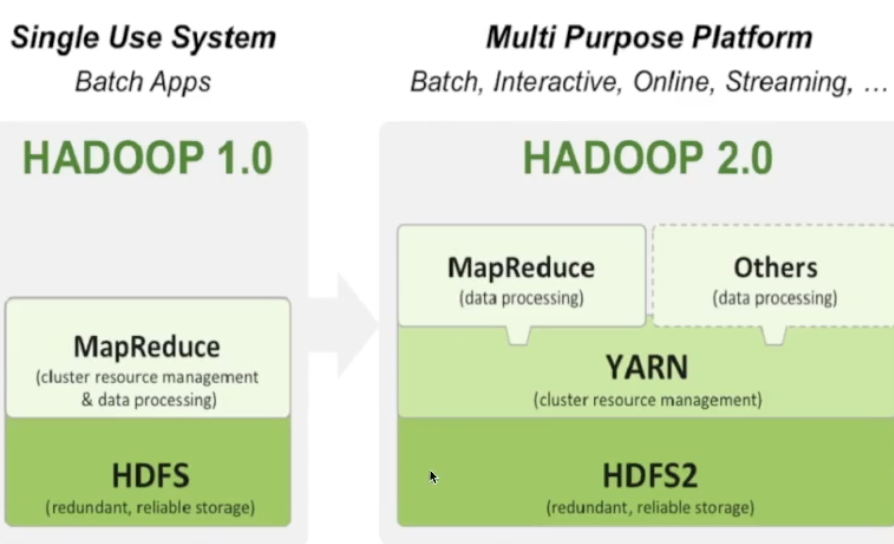
- YARN 프레임워크 만든 후, 자기만의 분산시스템 만들수 있게 개량

# 3. Spark
하둡은 1세대 빅데이터 처리기술이라면 Spark은 2세대 빅데이터 기술이라 할 수 있다. 

- Real-Time 데이터 처리

> Spark의 등장
- 버클리 대학의 AMPLab에서 아파치 오픈소스 프로젝트로 2013년 시작
    - 나중에 DataBricks라는 스타트업 창업
- 하둡의 뒤를 잇는 2세대 빅데이터 기술
    - 하둡 2.0을 분산환경으로 사용 가능
    - 자체 분산환경도 지원하기 함
    - Scala로 작성됨
- MapReduce의 단점을 대폭적으로 개선
    - Pandas와 굉장히 흡사 (서버 한대 버전 vs. 다수 서버 분산환경 버전)
- 현재 Spark 버전 3이며 이번 강좌에서는 이를 사용
    - 현재 `Scala, Java, Python3`으로 프로그래밍이 가능
    - 머신 러닝 관련해서 많은 개선이 있었음 (GPU 지원 포함)

> Spark vs. MapReduce
- Spark은 기본적으로 **메모리 기반**
    - 메모리가 부족해지면 디스크 사용
    - MapReduce는 **디스크 기반**
- MapReduce는 하둡 위에서만 동작
    - Spark은 하둡(YARN)이외에도 다른 분산 컴퓨팅 환경 지원
- MapReduce는 키와 밸류 기반 프로그래밍
    - Spark은 판다스와 개념적으로 흡사
- Spark은 다양한 방식의 컴퓨팅을 지원
    - 배치 프로그래밍, 스트리밍 프로그래밍, SQL, 머신 러닝, 그래프 분석

> Spark의 구조
- 드라이버 프로그램의 존재
- Spark은 하둡 2.0 (혹은 하둡 3.0) 위에 올라가는 애플리케이션

>- Spark 3.0의 구성
* Spark Core
* Spark SQL
* SparkStreaming
* MLlib (Spark.ML)
* SparkGraph

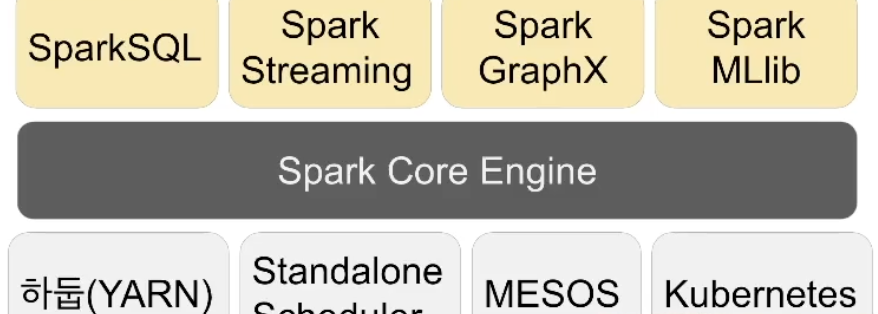

> Spark 프로그래밍 개념
- RDD (Resilient Distributed Dataset)
    - 로우레벨 프로그래밍 API로 세밀한 제어가 가능
    - 하지만 코딩의 복잡도 증가
- Dataframe & Dataset (판다스의 데이터프레임과 흡사)
    - 하이레벨 프로그래밍 API로 점점 많이 사용되는 추세
    - SparkSQL을 사용한다면 이를 쓰게 됨
- 보통 Scala, Java, Python 중의 하나를 사용

# 4. 판다스
- 파이썬으로 데이터 분석을 하는데 가장 기본이 되는 모듈 중 하나.
    - 엑셀에서 하는 일을 파이썬에서 가능하게 해주는 모듈이라고 생각하면 됨
    - matplotlib(시각화)나 scikit-learn(머신러닝)과 같은 다른 파이썬 모듈과 같이 사용됨
- **소규모의 구조화된 데이터** (테이블 형태의 데이터)를 다루는데 최적
    - **한 대의 서버에서 다룰 수 있는 데이터**로 크기가 제약이 됨
    - 병렬 처리를 **지원하지 않음**
    - 큰데이터의 경우 Spark을 사용
    - 작은 데이터를 다루는데 굳이 Spark을 쓸 필요가 없음!

> Pandas로 할 수 있는 일의 예
- 구조화된 데이터를 읽어오고 저장하기
    - CSV, JSON 등등 다양한 포맷 지원
    - 웹과 관계형 데이터베이스에서 읽어오는 것도 가능
- 다양한 통계 뽑아보기
    - 컬럼 별로 평균, 표준편차, percentile 등 계산하기
    - 컬럼 A와 컬럼 B간의 상관 관계 계산하기 (correlation)
- 데이터 청소 작업 -> 데이터 전처리
    - 컬럼별로 값이 존재하지 않는 경우 디폴트 값 지정하기
    - 컬럼별로 값의 범위를 조정하기 (normalization)
- Visualization
    - Matplotib와 연동하여 다양한 형태의 시각화 지원 (히스토그램, 바, 라인)

> Pandas의 데이터 구조
- 엑셀의 시트에 해당하는 것이 Dataframe
- 엑셀 시트의 컬럼에 해당하는 것이 Series
- 입력 dataframe을 원하는 최종 dataframe으로 계속 변환하는 것이 핵심
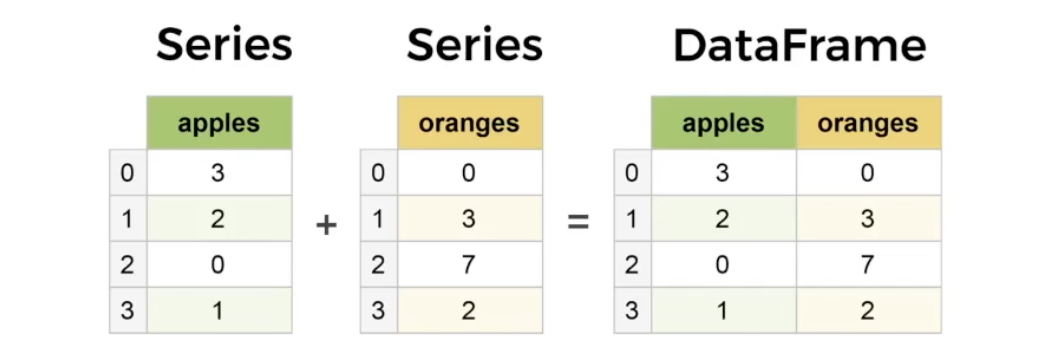

# 5. Spark 데이터프레임, 데이터셋, RDD
> Spark 세션
- Spark 프로그램의 시작은 Spark 세션(SparkSession)을 만드는 것
- Spark 세션을 통해 Spark이 제공해주는 다양한 기능을 사용
    - Spark 컨텍스트, Hive 컨텍스트, SQL 컨텍스트
    - Spark 2.0 전에는 기능에 따라 다른 컨텍스트를 생성해야 했음

```python
from pyspark.sql import SparkSession
spark = SparkSession \
.builder.appName("Python Spark create RDD example").config("spark.some.config.option", "some-value").getOrCreate()
sc = spark.sparkContext
# spark과 sc를 이용해 뒤에서 배울 RDD와 데이터프레임을 조작하게 됨
```

> Spark 데이터 구조
- 크게 3가지의 자료구조가 존재
- RDD (Resilient Distributed Dataset)
    - 로우레벨 데이터로 클러스터내의 **서버에 분산된 데이터를 지칭**
    - 레코드별로 존재하며 구조화된 데이터나 비구조화된 데이터 모두 지원
- Dataframe Dataset
    - RDD위에 만들어지는 하이레벨 데이터로 RDD와는 달리 필드 정보를 갖고 있음 (테이블)
    - **Dataset**은 Dataframe과는 달리 타입 정보가 존재하며 컴파일 언어에서 사용가능
        - 컴파일 언어: ScalalJava에서 사용가능
        - PySpark에서는 `Dataframe`을 사용함
        - SparkSQL을 사용하는 것이 더 일반적
- 구조화, 비구조화 데이터 모두 처리 가능.
- 구조화 데이터 처리할 때 시간이 더 걸린다.

> Spark 데이터 구조- RDD
- 변경이 불가능한 분산 저장된 데이터
    - RDD는 다수의 파티션으로 구성되고 Spark 클러스터내 서버들에 나눠 저장됨
    - 로우레벨의 함수형 변환 지원 (map, filter, flatMap 등등)
- RDD가 아닌 일반 파이썬 데이터 $\to$ RDD :`parallelize()` 함수 활용하여 변환

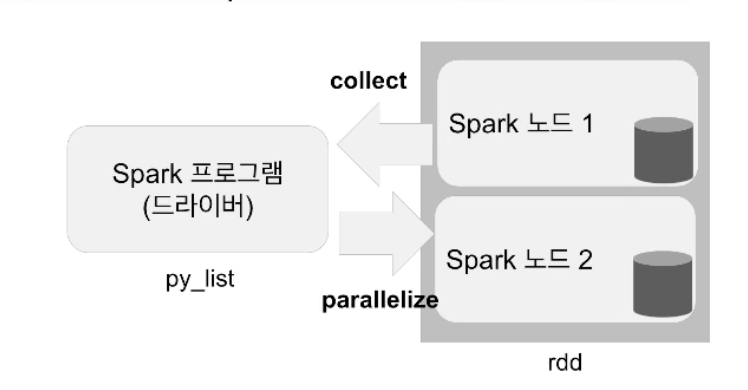

- Spark 클러스터로 데이터 올리기
```python
py_list = [
（1,2,3，'abc'），
(4, 5, 6, 'd e f'), (7, 8, 9, '8 h 1')]
rdd = sc.parallelize(py_list)

print(rdd.collect())
```
`collect()`시, 최종 데이터가 굉장히 작은 경우만! 하도 커서 에러날 수도.

> Spark 데이터 구조 - 데이터 프레임
- RDD처럼 데이터 프레임도 변경이 불가한 분산 저장된 데이터
- RDD와는 다르게 관계형 데이터베이스 테이블처럼 **컬럼**으로 나눠 저장
    - 판다스의 데이터 프레임과 거의 흡사
    - 데이터 프레임은 다양한 데이터소스 지원: 파일, Hive, 외부 데이터베이스, RDD 등등
- 스칼라, 자바, R, 파이썬과 같은 언어에서 지원

> Spark 데이터 구조 - 데이터 프레임 생성 방법
- RDD를 변환해서 생성: RDD의 toDF 함수 사용
- SQL 쿼리를 기반으로 생성: 아래 예 참조
    - tablename 자리에 SELECT 문도 사용가능
- 외부 데이터를 로딩하여 생성
    - createDataFrame
```python
df = spark.read.format ("jdbc") \
.option("url", "jdbc: postgresql://localhost:5432/databasename") \
.option("dbtable", "tablename") \
.option("user", "username") \
.option("password", "password") \
.option("driver", "org-postgresql.Driver") \
.load ()

df.printSchema()
```

> Spark 데이터 구조 - 데이터 셋
- Spark 1.6부터 추가된 새로운 데이터 타입
    - RDD와 Spark SQL의 최적화 엔진 두 가지 장점을 취함
- 데이터 셋은 타입이 있는 컴파일 언어에서만 사용 가능
    - 데이터 셋은 자바와 스칼라에서만 지원되며 파이썬에서는 사용불가

> Spark 세션
- Spark 프로그램의 모든 시작(Entry Point)은 **Spark 세션**(SparkSession). 이를 먼저 생성한다.
- Spark 세션을 통해 Spark이 제공해주는 다양한 기능을 사용
    - Spark 컨텍스트, Hive 컨텍스트, SQL 컨텍스트
    - Spark 2.0 전에는 기능에 따라 다른 컨텍스트를 생성해야 했음

```python
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder\
    .appName("Python Spark create RDD example")\
    .config("spark.some.config.option", "some-value")\
    .getOrCreate()
sc = spark.sparkContext
# spark과 sc를 이용해 뒤에서 배울 RDD와 데이터프레임을 조작하게 됨
```

# 6. spark 개발환경

> 개인컴퓨터에 설치하고 사용하는 방법
1. 간편하기는 하지만 노트북등을 설치하려면 복잡해짐
2. 아니면 spark-submit를 이용해 실행가능
- 각종 무료 노트북을 사용하는 방법
1. 구글 Colab 이용: 이번 강의에서 사용할 환경
2. 데이터브릭(Databrick)의 커뮤니티 노트북 사용 
3. 제플린의 무료 노트북 사용: https://app.zepl.com/register
- AWS의 EMR 클러스터 사용
1. 이는 사실 프로덕션 환경에 가까움
2. 나중 세션에서 간단히 소개

> 참고) Spark 로컬환경 설치방법
- http://spark.apache.org/downloads.html
1. spark-3.0.1-bin-hadoop2.7.tgz을 각자 환경에 맞게 다운로드하고 압축해제 
2. SPARK_HOME 환경변수를 위의 패키지가 설치된 디렉토리로 지정 
3. Spark의 bin 디렉토리 패스를 PATH 환경변수에 지정 iv. pyspark 파이썬 모듈을 설치
- 실행방법
1. 이 위에 주피터 노트북이나 제플린 노트북을 설치하여 실행
    - 의 링크를 참조
2. spark-submit을 이용해서 파이썬 스크립트를 실행


> 제플린 노트북 사용방법
- https://app.zepl.com/register에서 무료 회원가입
- 제플린이란?
    - 주피터와 같은 웹기반 노트북으로 파이썬, 스칼라, SQL등의 다양한 코드를 작성, 실행, 결과확인 (시각화 포함), 수정을 손쉽게 반복하고 다른 사람과 공유할 수 있음
    - 주피터와 차이점
    - Spark을 기본으로 지원하고 파이썬과 스칼라와 SQL을 지원
    - 인터프리터는 플러그인 구조로 만들어져서 있기에 다른 모듈과의 연동이 쉬움
    - 그 이외에는 대동소이 (시각화 지원, 노트북 공유 용이)

